# How well Data Roles Pay?

#### Following Roles are Analyzed:
1. Data Analyst
2. Data Engineer
3. Data Scientist
4. Senior Data Analyst
5. Senior Data Engineer
6. Senior Data Scientist

# How Skills for Data Analyst Pay? 

Top 10 Skills are Analyszed

#### Methdology
1. Evaluate Median Salary for Roles
2. Evaluate Median Salary For Skills for Data Analyst
3. Find Top Skills and Median Salary for them
4. Visualize

### Loading and Cleaning

In [1]:
# importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns

# loading data set
df = pd.read_csv("C:\\Users\\Dell\\Documents\\VSCODE\\Python\\Data Analysis\\Data\\data_jobs.csv")

# data cleaning
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x : literal_eval(x) if pd.notna(x) else x)

### Evaluating Median Salary For Jobs

In [65]:
roles_interest = ["Data Analyst", "Data Engineer", "Data Scientist",
                  "Senior Data Analyst", "Senior Data Engineer", "Senior Data Scientist"]
country = "United States"

In [66]:
#Extracting only roles of interest
df_jobs = df[(df["job_title_short"].isin(roles_interest)) & (df["job_country"] == country)][["job_title_short", "salary_year_avg"]].dropna(subset = "salary_year_avg")

#Calculating median salary
df_median_salary = df_jobs.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending = False)

### Visualizing

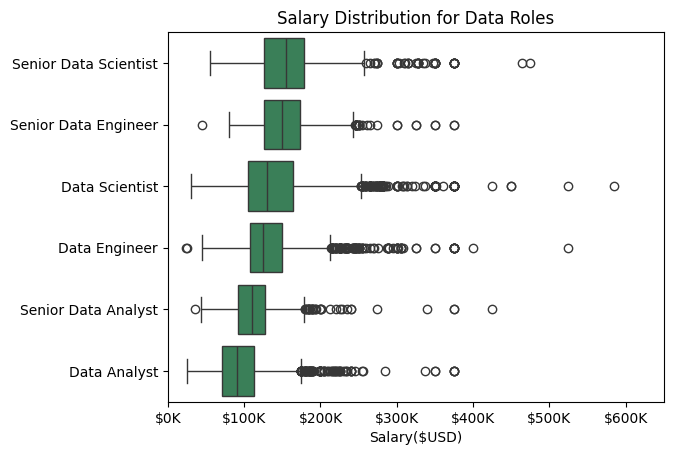

In [67]:
sns.boxplot(
    data = df_jobs,
    x = "salary_year_avg",
    y = "job_title_short",
    order = df_median_salary.index,
    orient = "h",
    color = "seagreen"
)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f"${int((x / 1000))}K"))
plt.xlim(0, 650_000)
plt.ylabel("")
plt.xlabel("Salary($USD)")
plt.title("Salary Distribution for Data Roles")
plt.show()

### Top Skills vs Pay

In [68]:
role = "Data Analyst"
country = "United States"
top = 10

In [69]:
#Extracting median saalry and count of all skills
df_DA = df[(df["job_title_short"] == role) & (df["job_country"] == country)][["job_skills", "salary_year_avg"]].dropna(subset = ["salary_year_avg"])
df_explode = df_DA.explode("job_skills")
df_skills = df_explode.groupby("job_skills").agg(
    count = ("job_skills", "size"),
    median = ("salary_year_avg", "median")
)

### Visualize

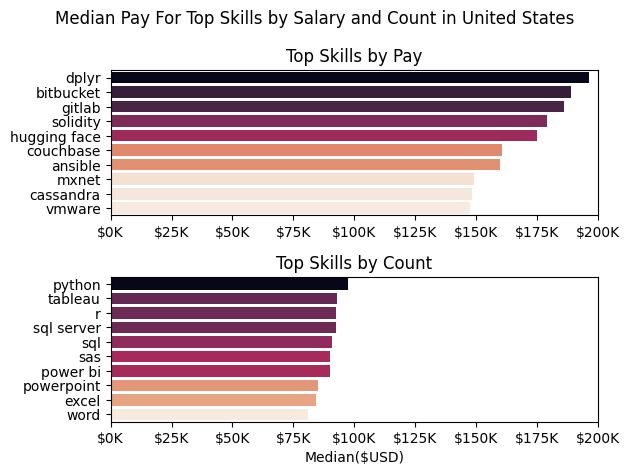

In [70]:
fig, ax = plt.subplots(2, 1)
visualize = {
    "Top Skills by Pay" : "median",
    "Top Skills by Count" : "count"
}

for i, (title, stat) in enumerate(visualize.items()) :
    df_temp = df_skills.sort_values(by = stat, ascending = False).head(top).sort_values(by = "median", ascending = False)
    sns.barplot(
        data = df_temp,
        y = "job_skills",
        x = "median",
        ax = ax[i],
        orient = "h",
        hue = "median",
        palette = "rocket_r",
        legend = False
    )
    ax[i].set_title(title)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f"${int(x / 1000)}K"))
    ax[i].set_xlim(0, 200_000)

ax[1].set_xlabel("Median($USD)")
plt.suptitle("Median Pay For Top Skills by Salary and Count in United States")
plt.tight_layout()
plt.show()